# Unsupervised Learning Predict

© Explore Data Science Academy

### Predict Overview: Movie Recommendation Challenge

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.


### Problem Statement:

With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

#### What value is achieved through building a functional recommender system?

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [91]:

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit
import time
import datetime


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD,NormalPredictor
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering,BaselineOnly
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


In [32]:

# import dataset

#Movies dataframe
movies_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')

#Genome_scores dataframe
genome_score = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')

#Genome_tags dataframe
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')

#imbd dataframe
imdb_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')

#links dataframe
links_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')

#tags dataframe
tags_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

#train dataframe
train_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')

#test dataframe 
test_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')

#sample submission
sample_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv')

Above we have the following datasets

* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

**Data Description & Summary Statistics**

train and test data info and shape

In [33]:
#display the first 5 rows of our training dataframe
display(train_df.head())

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [34]:
#display the composition of our training dataframe
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

In [35]:
#Sum and display missing values in the rows of our dataframe
print(train_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


None

We can see that the train df has over 10 million entries with only 4 features.Now let us do further analysis of the training set.

In [36]:
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train_df.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train_df["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train_df["movieId"]))))
print("Highest value of a User ID = "+str(max(train_df["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train_df["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


**Observations:**

* There are 10000038 rows and 4 columns.
* The data types consist of 3 integer and 1 float data type
* The size of the data is 305.2 MB
* The date is in timestamp, this would be converted to data time during feature engineering.

In [37]:
# View test data info, shape and content  
display(test_df.head(3))
display(test_df.info()) 
print(test_df.isnull().sum()) 

,userId,movieId
0,1,2011
1,1,4144
2,1,5767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

userId     0
movieId    0
dtype: int64


**movies data**

In [38]:
# View movies data info and shape and content head 
display(movies_df.head())
print("\n")
movies_df.info() 
print(movies_df.isnull().sum()) 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movieId    0
title      0
genres     0
dtype: int64


**Genome Scores and tags**

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. The file genome-scores.csv contains movie-tag relevance data in the following format:

movieId,tagId,relevance The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

tagId,tag

In [39]:
#genome tags data composition
genome_tags.info() 
print('\n')
#genome score data composition
genome_score.info() 
print('\n')
#genome tags first 5 rows
display(genome_tags.head()) 
print('\n')
#genome tags all null values
print(genome_tags.isnull().sum())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB




,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s




tagId    0
tag      0
dtype: int64




**Imdb database of movies**

In [40]:
#imdb_df first five rows
display(imdb_df.head()) 
print('\n')
#imdb_df composition of the dataframe
display(imdb_df.info()) 
print('\n')
#imdb_df sum all null values for 

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

There are **62423** movies in the movies database and only **27278** in the imdb dataset. The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

There are alot of missing values in this data frame,to invesitage further we will look into the dataframes column by column to a clear description of the dataset by looking at the count, perecntage of missing values aswell as the datatype for each column.

In [41]:
print(f'The imdb dataset has {imdb_df.shape[0]} rows/entries and {len(imdb_df.columns)} columns')
percentange=imdb_df.isnull().mean().round(4) * 100
count = imdb_df.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':imdb_df.dtypes},
                                index=imdb_df.columns)
count_percentage

The imdb dataset has 27278 rows/entries and 6 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title_cast,10068,36.91,object
director,9874,36.20,object
runtime,12089,44.32,float64
budget,19372,71.02,object
plot_keywords,11078,40.61,object


The imdb dataset has 27278 rows/entries and 6 columns

It appears that most of the columns in the Dataset has over 25 % of missing values, meaning that our dataset has caputured only 75% or less information from the real world data. Missing Values is a common occurance when dealing with real world data. There are various ways to handle missing values the most effective technique being imputing missing values with either a 0 or using aggregate methods such as mean and median.

**count of unique entries of features of interest in the database**

In [42]:
# Count the number of unique entries for features of interest
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_tags = len(tags_df['tag'].unique().tolist())
unique_users = len(train_df['userId'].unique().tolist())
unique_directors = len(imdb_df['director'].unique().tolist())
unique_actors = len(imdb_df['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

# Determine and display the min and max ratings received
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


Lowest rating: 0.5
Highest rating: 5.0


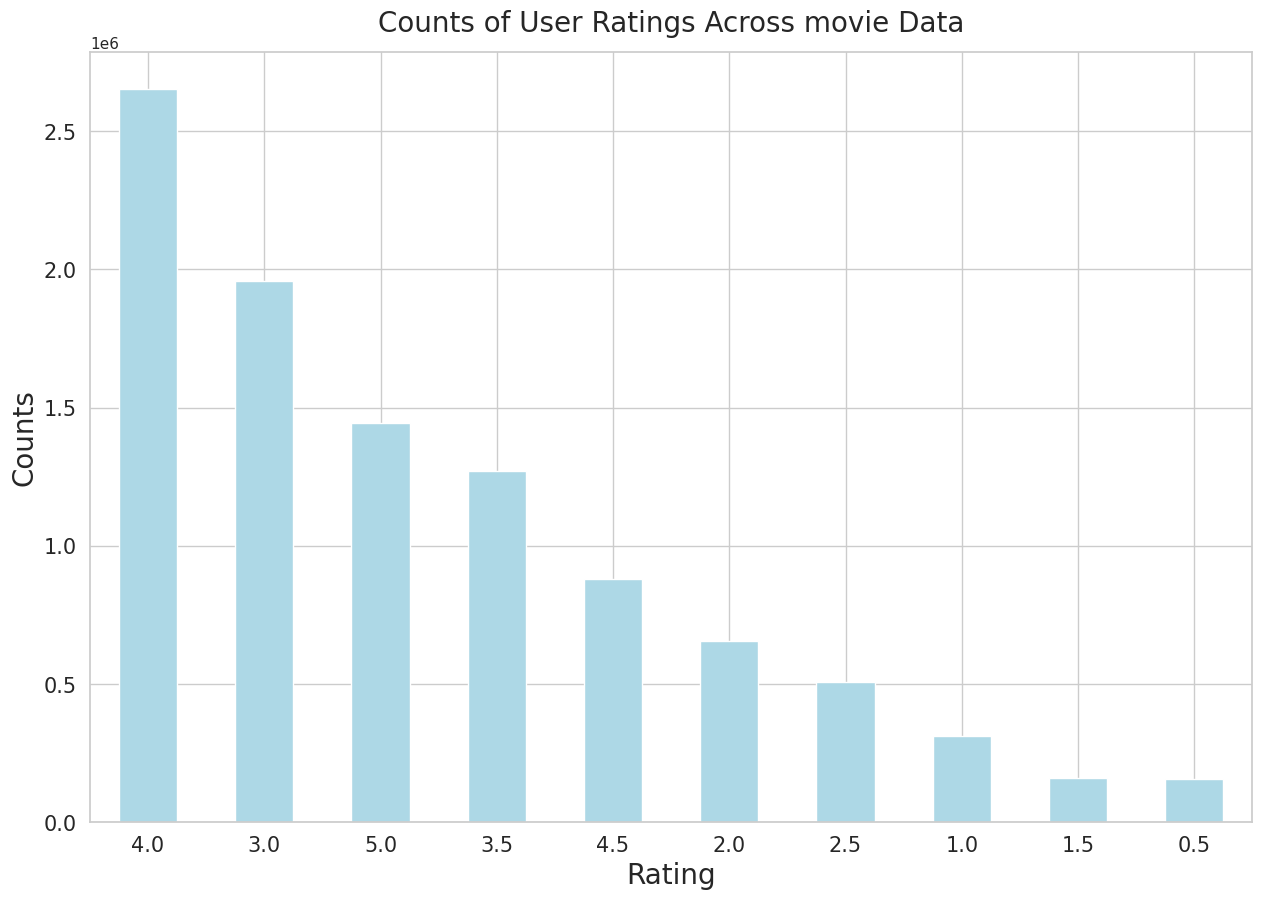

In [43]:
#get ratings for 
train_df.rating.value_counts().plot(kind = 'bar', fontsize = 15,
                               color = 'lightblue', rot = 'horizontal',
                               figsize = (15,10));
# name the axis and also the plot
plt.xlabel('Rating', size =20);
plt.ylabel('Counts', size = 20);
plt.title('Counts of User Ratings Across movie Data', size = 20, pad = 15);

We can see clearly from the bar plot that most users gave a 4 star rating to the movies, which represent about, 26.5% of the whole movie dataset and the least ratings of 0.5, 1.5., and 1.0 represent just 7% of the train data, this can be seen clearly from the pie chart below

**Tags database**

In [44]:
#Display first five rows for our tags dataframe
display(tags_df.head()) 
print('\n')
#display the compostion of our tags dataframe
display(tags_df.info()) 
print('\n')
#Print the total number of null values in our dataframe
print(tags_df.isnull().sum())

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


None



userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


**Number of entries in the Dataframe in Tabular form**

In [45]:
#Created a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_scores']
Number_of_entries = [len(train_df), len(test_df), len(tags_df),
         len(movies_df), len(links_df), len(imdb_df), 
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, Number_of_entries)),
                             columns=['dataframe', 'Number of entries'])
total_size_df

,dataframe,Number of entries
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,62423
4,links_df,62423
5,movies_df,27278
6,genome_tags,1128
7,genome_scores,15584448


We have Obeserved the number of entries/length of our df

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


![image.png](https://media2.giphy.com/media/nCzrl2mzk9BT2/giphy.gif?cid=ecf05e47bkkca5eadgt2s344z73gksfo6j429a1pdyz4q2oa&rid=giphy.gif&ct=g)

# Exploring rating trends by genre over time



<center><img src="https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX23926136.jpg" width="50%" /></center>

In this section we aim to develop an understanding of how the ratings for the various genres change over time. This analysis is challenging as most movies have more than one genre, such as "Romantic comedies" or "Dramic thrillers". In the below analysis we refer to 'genre' as the entire classification in the dataframe and 'subgenre' as the descriptions separated by pipes (|) in the genre column.

We will begin by examining the number of unique genres listed in the dataframe.

In [46]:
#We will merge the movies dataframe and the movies dataframe
new_data = pd.merge(train_df, movies_df, on='movieId', how='left')

In [47]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
new_data['rating_year'] = new_data['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).year)
new_data.drop('timestamp', axis=1, inplace=True)

In [48]:
## function to change "Sci-Fi" to "Sci_Fi", "Film-Noir" to 'Film_Noir' and '(no genres listed)' to 'no_genres_listed' in genres
def change_genre(genre):
    # dictionary to map old and new name
    dct_ = {'Sci-Fi':'Sci_Fi','Film-Noir':'Film_Noir',
            '(no genres listed)':'no_genres_listed'}
    lst = [] # list to store genres in genre
    # iterate inside of the the genre in each row
    for i in genre:
        # change only the words in the dict_
        if i in dct_.keys():
            i = dct_[i]
            lst.append(i)
        else:
            # leave other words as they are
            i = i
            lst.append(i)
    # return genre strings
    return " ".join(lst)

In [49]:
# merge train and movie data on movieId and sort the table
train_joined = pd.merge(train_df.drop(columns = 'timestamp'),movies_df, how = 'inner', on = 'movieId').sort_values(by = ['userId','movieId'])
# confirm if joined table has the correct amount of observations
print(train_joined.shape)
# view first five rows of joined table
train_joined.head()

(10000038, 5)


,userId,movieId,rating,title,genres
502801,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
6852635,1,665,5.0,Underground (1995),Comedy|Drama|War
6086993,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance
6325668,1,1175,3.5,Delicatessen (1991),Comedy|Drama|Romance
5047680,1,1217,3.5,Ran (1985),Drama|War


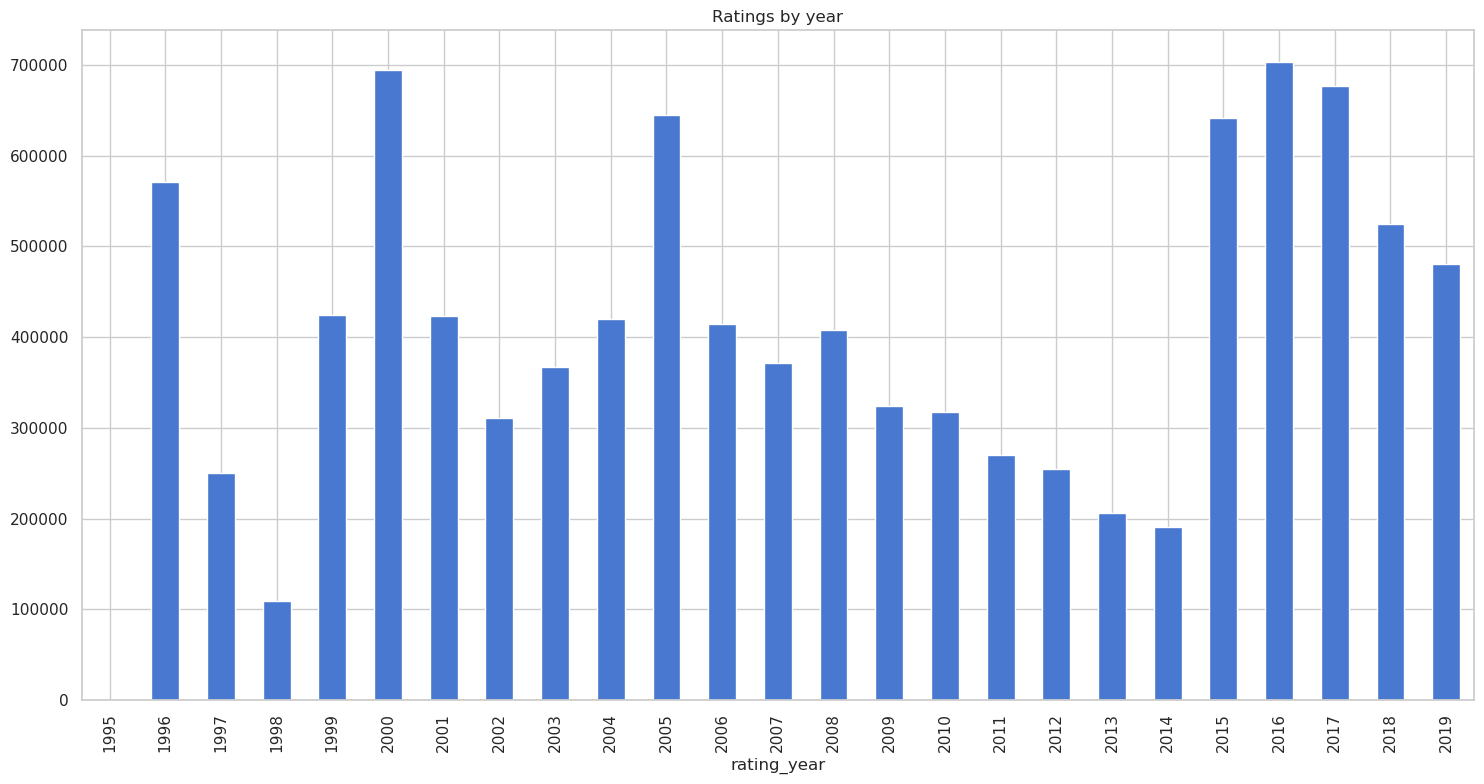

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax1 = new_data.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year')
fig.tight_layout()

__2016__ has the most number of ratings when compared to the other years.
having approximately __700 000__ ratings

We have been provided with a lot of datasets to help us model at a good recommender system. We will perform an EDA to get as much information about the movies and users as we can from the database,to make data driven decisions.

Here we will go ahead and do an extensive analysis on:
* Ratings and users
* Runtime
* Genres
* Release year
* Directors
* Actors
* Plot keywords


### Ratings and users

Using the train dataset, we can get an overview of how each user was rated for each movie. It was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 
 <br>

__Which users have rated the most movies ?__

In [51]:
#In the function below we look at the users who rated movies the most
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='Set1', edgecolor="white")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=18)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


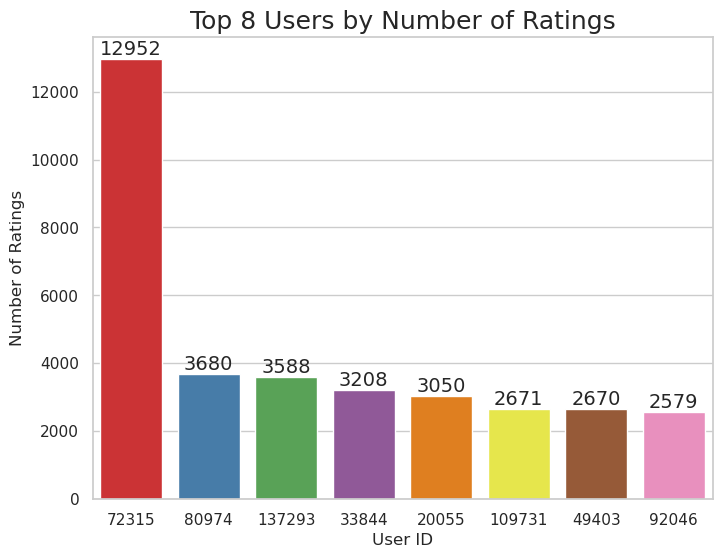

In [52]:
user_ratings_count(train_df,8)

The user 72315 has rated a lot of movies compared to the other users,we will remove this user for EDA purposes.

In [53]:
#user 72315 is removed to prevent the data from being skewed 
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


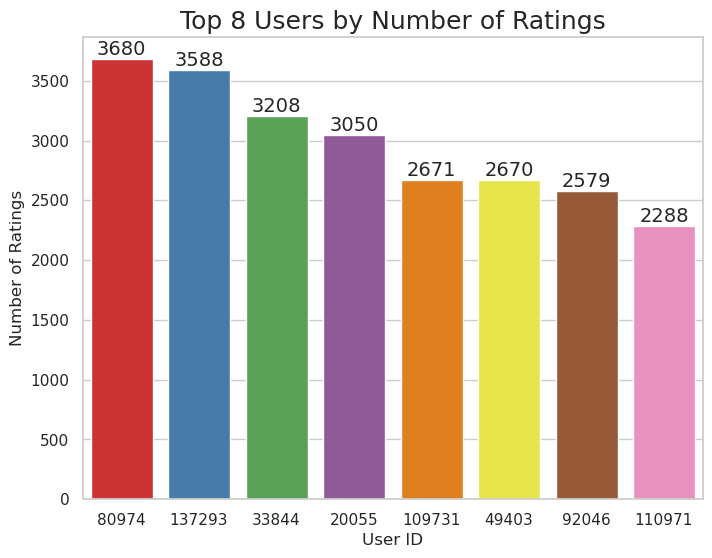

In [54]:
user_ratings_count(eda_df,8)

In [55]:
from datetime import datetime

def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]
def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count
def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count

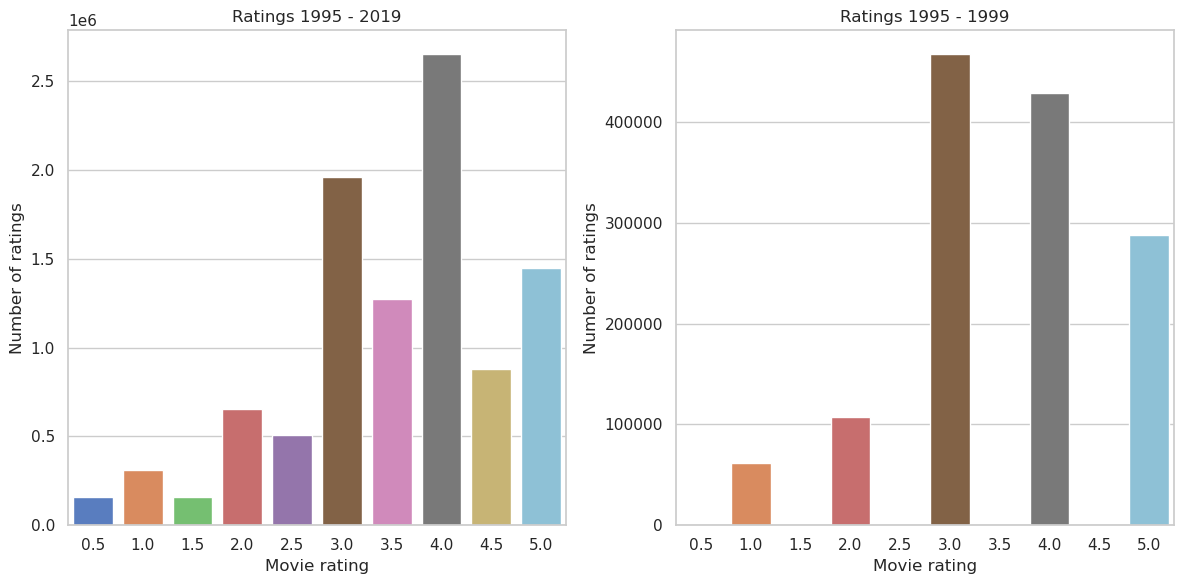

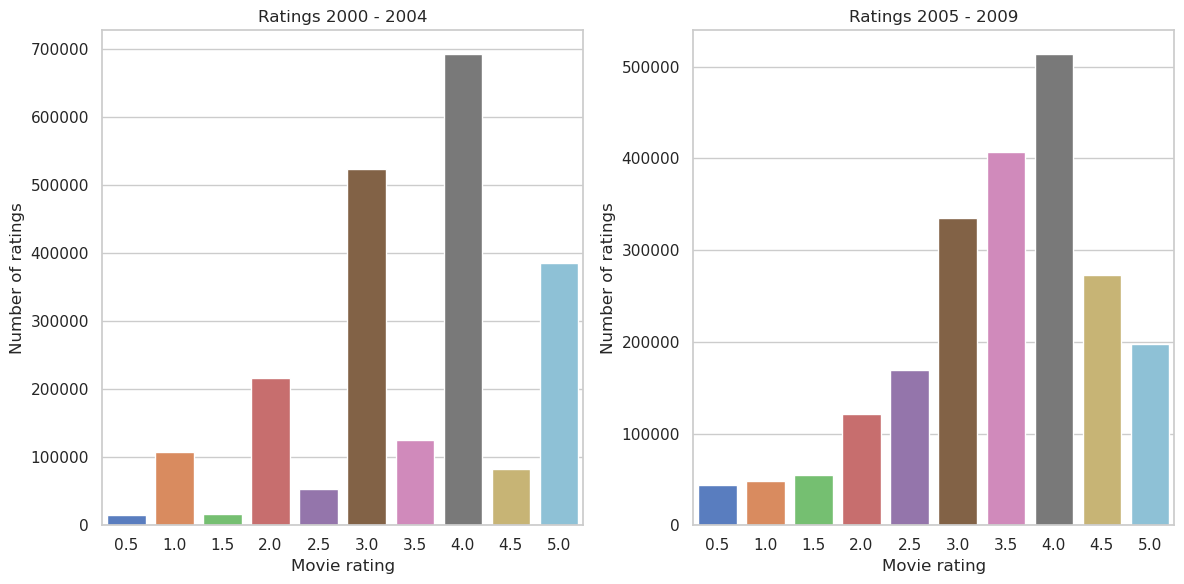

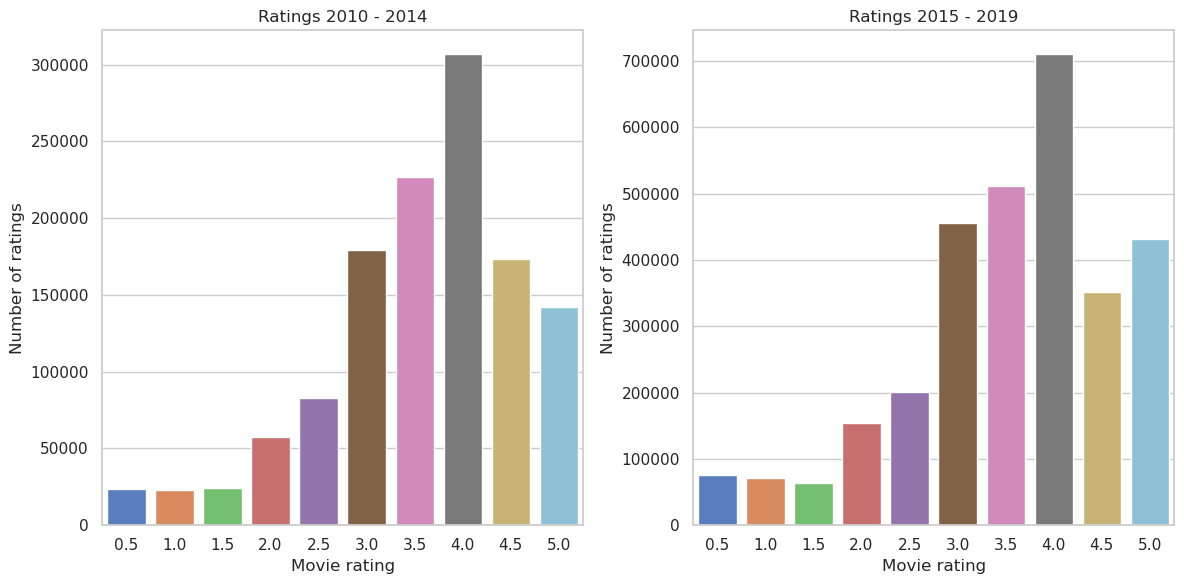

In [56]:
import seaborn as sns 

keys = np.linspace(0.5, 5.0, 10)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 1995, 2019), ax=ax[0])
ax1.set_title('Ratings 1995 - 2019')
ax1.set(xlabel='Movie rating', ylabel='Number of ratings')

ax2 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 1995, 1999), ax=ax[1])
ax2.set_title('Ratings 1995 - 1999')
ax2.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax3 = sns.barplot(x=keys,y=count_ratings_by_years(new_data, 2000, 2004), ax=ax[0])
ax3.set_title('Ratings 2000 - 2004')
ax3.set(xlabel='Movie rating', ylabel='Number of ratings')

ax4 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2005, 2009), ax=ax[1])
ax4.set_title('Ratings 2005 - 2009')
ax4.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax5 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2010, 2014), ax=ax[0])
ax5.set_title('Ratings 2010 - 2014')
ax5.set(xlabel='Movie rating', ylabel='Number of ratings')

ax6 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2015, 2019), ax=ax[1])
ax6.set_title('Ratings 2015 - 2019')
ax6.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

From 1995-2019,the most common rating is 4.0, which might mean only the users who loved the movie are likely to leave a rating. The period between 1995 and 1999 did no have a very high number of ratings and a rating of 3.0 was the most popular. The patterns in ratings in all the periods indicated in the graphs can be used to explain about patterns in movie development and user preferences. Interestingly, movie data can be used to infer so much about movie popularity, behavior of movie lovers and the likelihood of one rating a movie after watching.

#### Let us look at the number of ratings the we have lost because of removing the outlier.

In [57]:
#As a result of using one user
print("No of ratings lost:\t",34398-23734)
print("Movies rated by user 72315:\t",48213-45844)

No of ratings lost:	 10664
Movies rated by user 72315:	 2369


__What is the distribution of ratings from worst to best__

In [58]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    """
    plt.figure(figsize=(10,10))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="blue")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

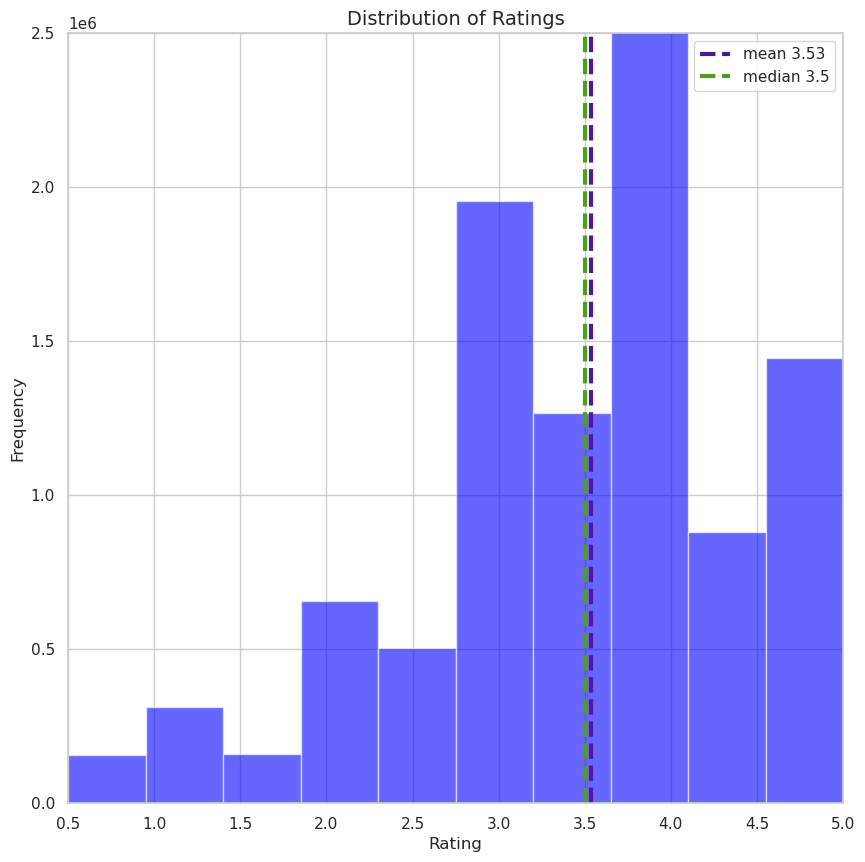

In [59]:
ratings_distplot(eda_df)

Here the we can see that the ratings have a left skewed distribution,This implies that most users tend to only give psitive reviews.

__Lets look at the percentage of movies rated in each categor__

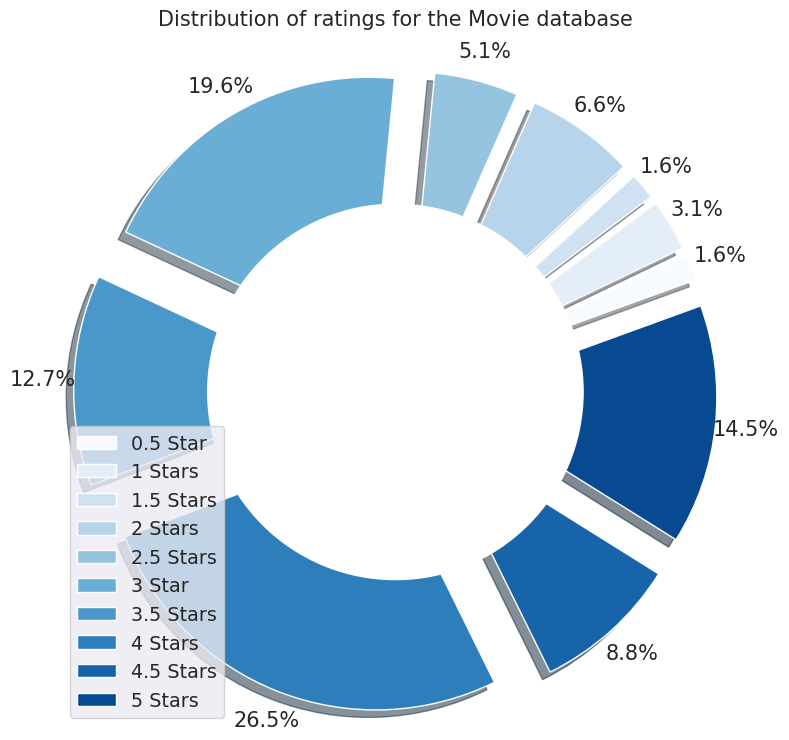

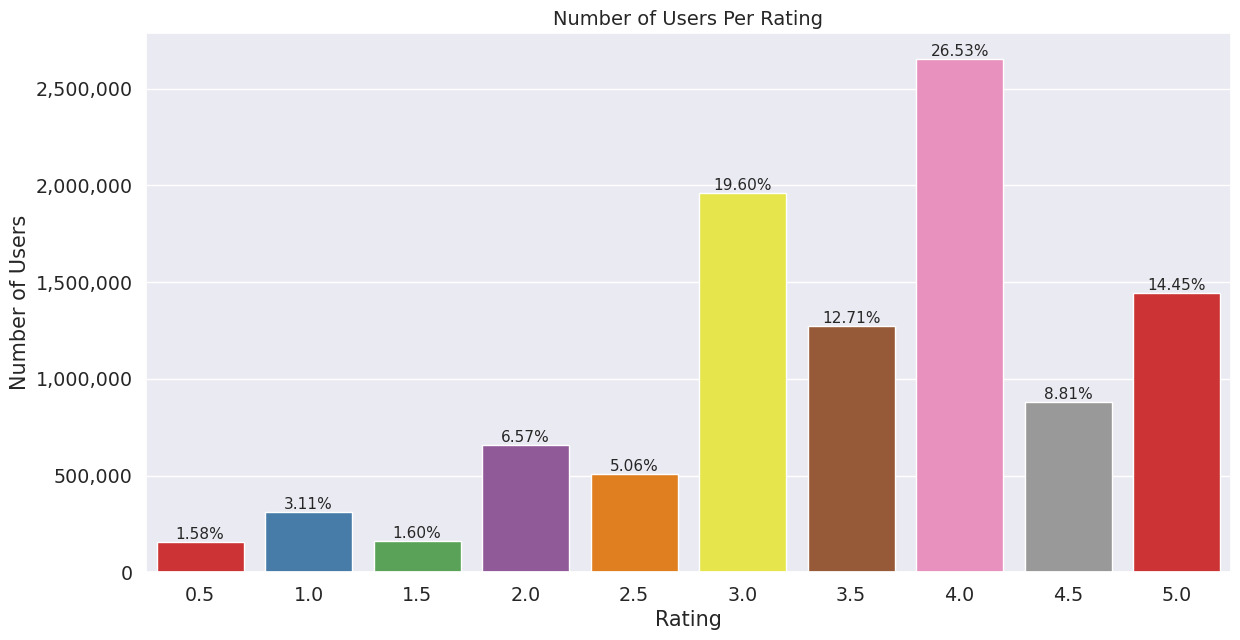

In [60]:
# Merge train with movies to join movie titles and ratings 
ratings = train_df.merge(movies_df, on='movieId', how='inner')

# Count how many ratings are in each category OO
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Blues')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.2, 0.2, 0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Distribution of ratings for the Movie database\n', fontsize=15)
plt.tight_layout()
plt.show()


movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="Set1", edgecolor="white", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

This chart can be explains that people only tend to rate the movies that they like. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end,and therefore they will not rate it.

Most of the users are weighted within the score range of 3.0 - 5.0, with the most users being weighted in the 4.0 score, accounting for 26.53% of the users. This indicates that most of the users give ratings above 2.5, and with fewer users giving a score of 0.5 which only only consists of 1.58% of the users. Similiarly with the score of 1.5 only accounting to 1.60% of users.

In [63]:
def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]
def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count
def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count

In [64]:
# Creating a genre count column, for the number of genres a movie belongs to
new_data['genre_count'] = new_data['genres'].apply(lambda genres: len(genres.split('|')))

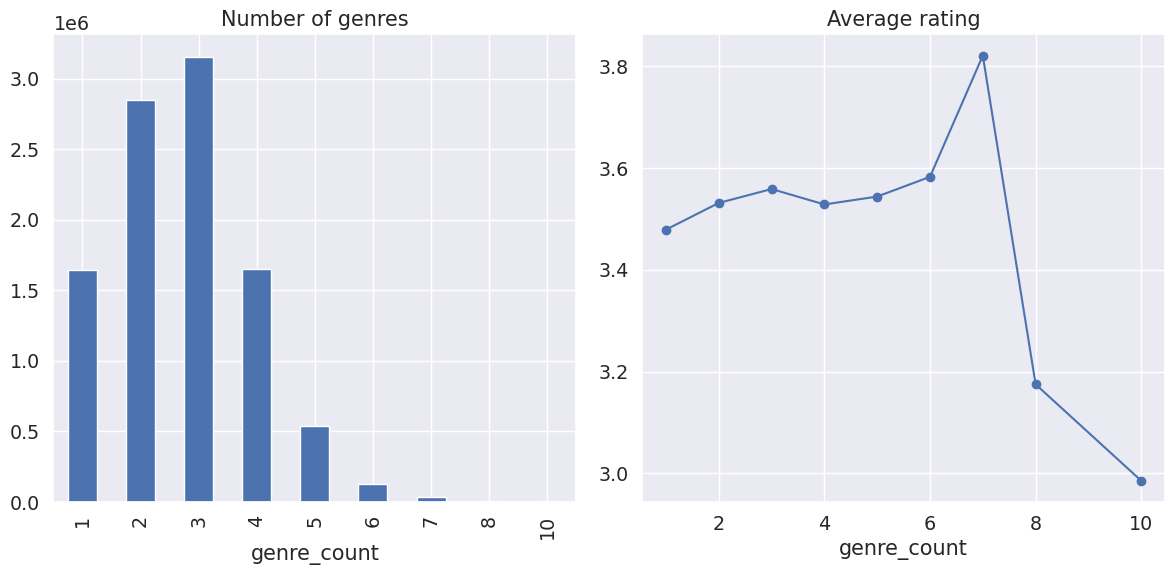

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = new_data.groupby('genre_count')['rating'].count().plot(kind='bar', title='Number of genres', ax=ax[0])
ax2 = new_data.groupby('genre_count')['rating'].mean().plot(kind='line', marker='o', title='Average rating', ax=ax[1])

fig.tight_layout()

The general view is that from the late 1800s the world has seen a steady increase in the numbers of movie released per year. It can be attributed to economic growth, technological advancements and a rise in talents within the movie making industry.

In [66]:
# Creating the release year by extracting the release year from the movie title
new_data['release_year'] = new_data['title'].apply(get_release_dates)

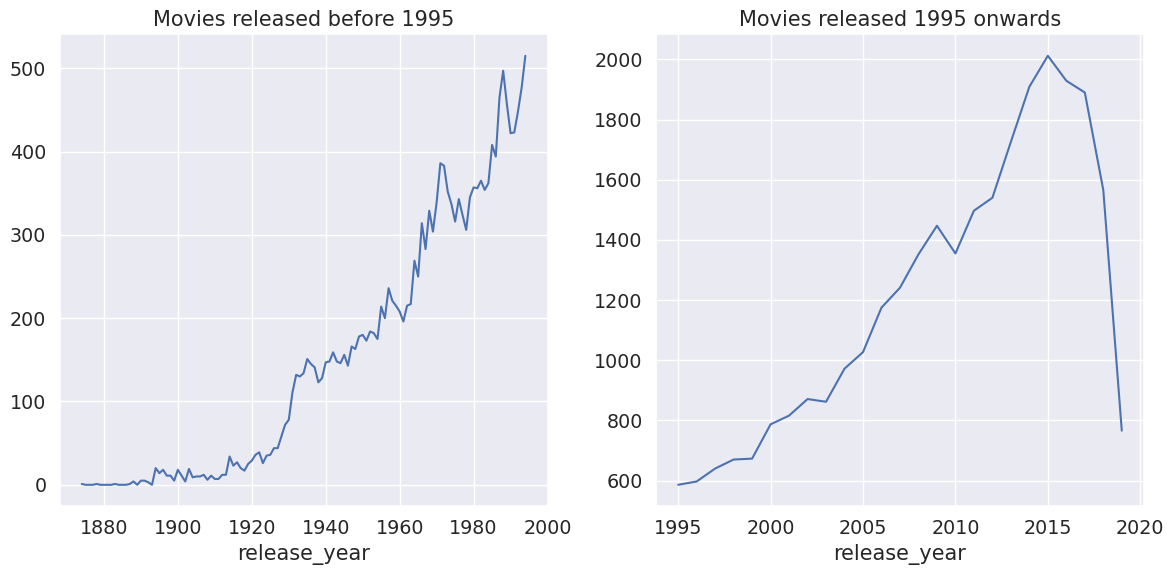

In [67]:
# Creating a visual of pre 1995 and post 1995 movies release
pre_95_releases = pd.DataFrame({'release_year': list(range(1874, 1995)),
                                       'count': get_releases_by_year(new_data, range(1874, 1995))})
post_95_releases = pd.DataFrame({'release_year': list(range(1995, 2020)),
                                       'count': get_releases_by_year(new_data, range(1995, 2020))})

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = pre_95_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[0], title='Movies released before 1995')
ax2 = post_95_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[1], title='Movies released 1995 onwards')

fig.tight_layout()

Period between 1995 to 2019 saw the production of 29,906 movies. In comparison 17,937 movies were produced from 1994 backwards to 1874. The sharp increase in movie production can be attributed to advancements in technology and funding availability. A movie recommender system is key for users who have a large number of movies to select what to watch.

### Runtime

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try to gain some additional insights about the nature of movie lengths and their evolution over time.


<Axes: xlabel='runtime', ylabel='Density'>

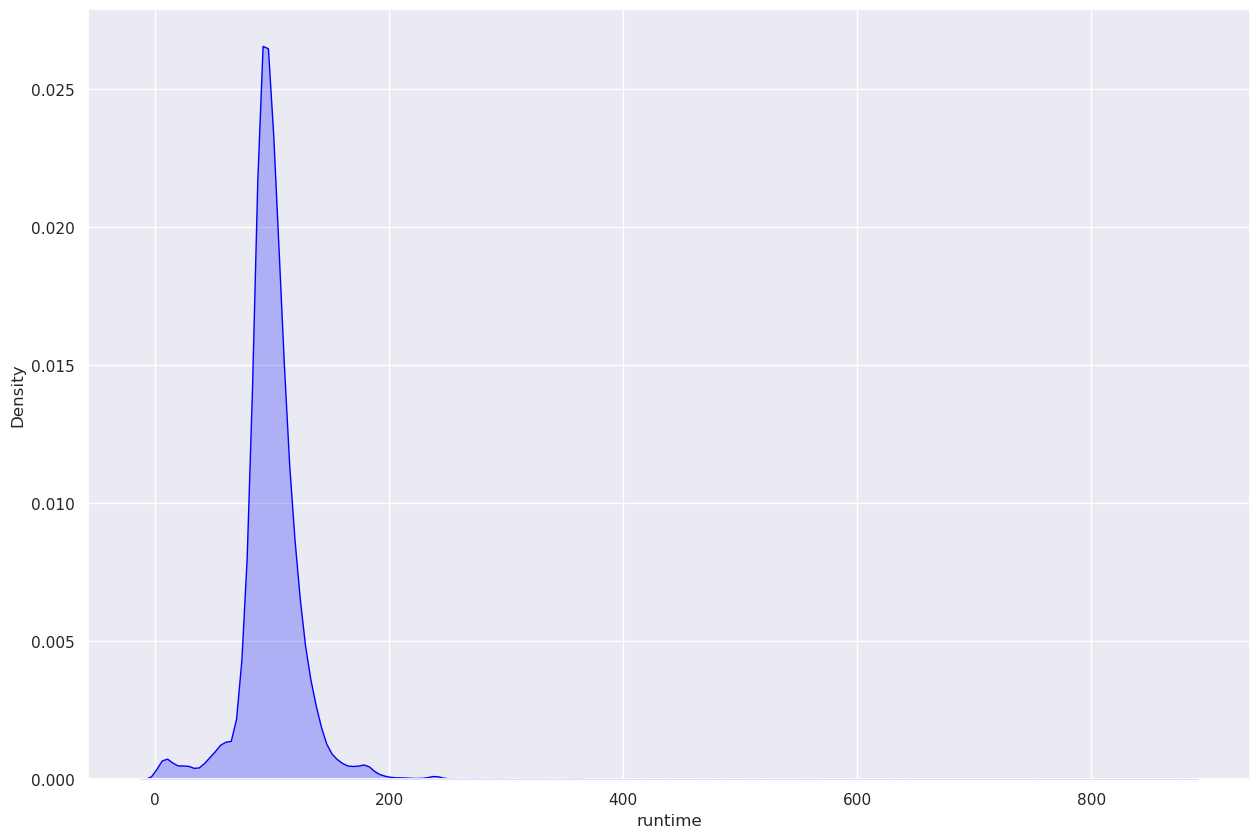

In [68]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb_df['runtime'], shade=True, color='blue')

let us do a descriptive analysis to make more sense of our graph above:

In [69]:
# Describe the runtime 
imdb_df['runtime'].describe()

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64

Here it can be seen that the average length of a movie is 1hr 40 minutes ,with the longest one having 877 minutes. There is also  a film as short as 1 minute. 

### Genres

__The most common Genres observed__

In [78]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    -------
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [79]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='Set1', orient='h', edgecolor='white',)
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

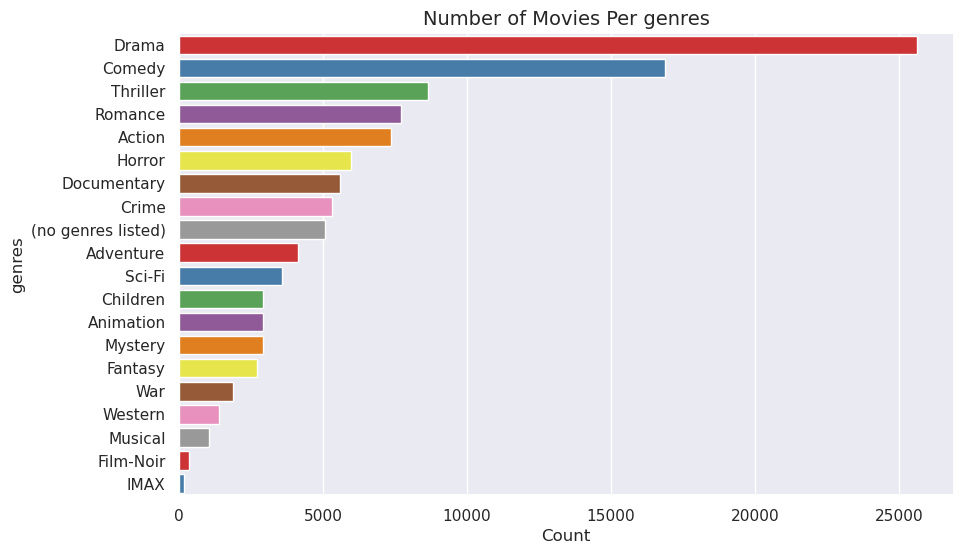

In [80]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Here we can see about 5000 movies have no (genres listed) .Drama can also be seen as the most frequent genre in the database. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor.

Other major genres in the top 10 are Thriller, Romance,Action, Horror, Documentary and Crime.
IMAX is not a genre but rather a proprietary system for mass-viewings.

We can use the IMDB and TMDB ID's together with the APIs to fill missing data. 

__The above figure does tell us the most frequent genres in the database but nothung about the popularity of the genres, lets look at the most popular movies in a particular time based on their ratings__

In [98]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies_df,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return most_watched(train_df)

According to this graph we have the most popular genres are  Drama and comedy,with drama being the most popular at all times since 1995.

**Top-N Recommendations**

With our content similarity matrix computed, we're now ready to make some recommendations. We will begin by generating a top-N list of movies similar to one which we prompt the system with.


### Release Year

The dataset has 48213 movies available to us. It is reasonable to assume that it does include almost every major film released during those years. With these assumptions in mind, let us take a look at the number of movies produced by the year.

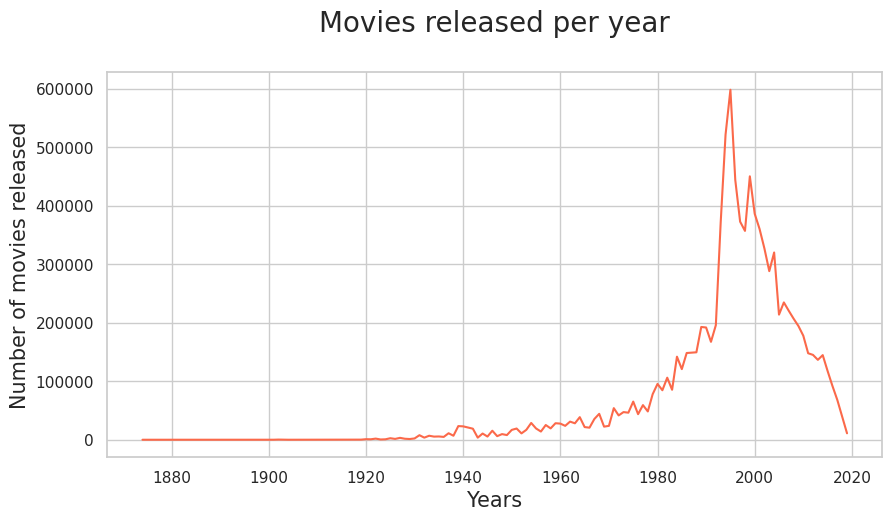

In [99]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

It is observed that most movies were released as we approached 2000 and reached at their peak during the 1990's,This could be because the increase in technological advancements like the introduction of motion picture projectors and more people having access to the entertainment in theatres.

In [100]:
# merge train and movie data on movieId and sort the table
train_joined = pd.merge(train_df.drop(columns = 'timestamp'),movies_df, how = 'inner', on = 'movieId').sort_values(by = ['userId','movieId'])
# confirm if joined table has the correct amount of observations
print(train_joined.shape)
# view first five rows of joined table
train_joined.head()

(10000038, 5)


,userId,movieId,rating,title,genres
502801,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
6852635,1,665,5.0,Underground (1995),Comedy|Drama|War
6086993,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance
6325668,1,1175,3.5,Delicatessen (1991),Comedy|Drama|Romance
5047680,1,1217,3.5,Ran (1985),Drama|War


In our first five lines we observe that user 1 likes __Pulp fiction and Underground the most__ the user has given a rating of 5 for both films

### Directors

__Who are the most common directors__

We will only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors

In [104]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

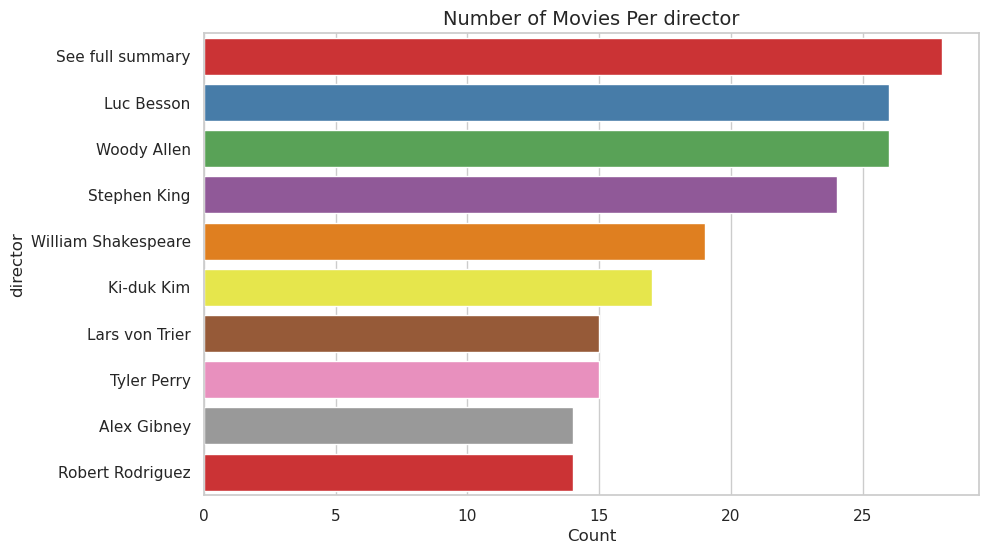

In [105]:
feature_count(directors.head(10), 'director')

'see full summary' is not a director ,we can use IMDB API to retrieve this data,so Luc Besson and woody Allen can be seen as the most common directors.

##### We could also use a word cloud to show the same while remove the 'see full summary'.

__Let us prepare a data set for word cloud and corpus generation__

In [106]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)

In [107]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces 
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes 
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))


# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhanks timallen donrickles,johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995),1995
1,2,robinwilliams jonathanhyde kirstendunst,jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995),1995
2,3,waltermatthau jacklemmon sophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995),1995
3,4,whitneyhouston angelabassett lorettadevine,terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995),1995
4,5,stevemartin dianekeaton martinshort,alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995),1995


In [108]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be removed 
    removed = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in removed]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=1000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Blues').generate_from_frequencies(words)

    return wordcloud 

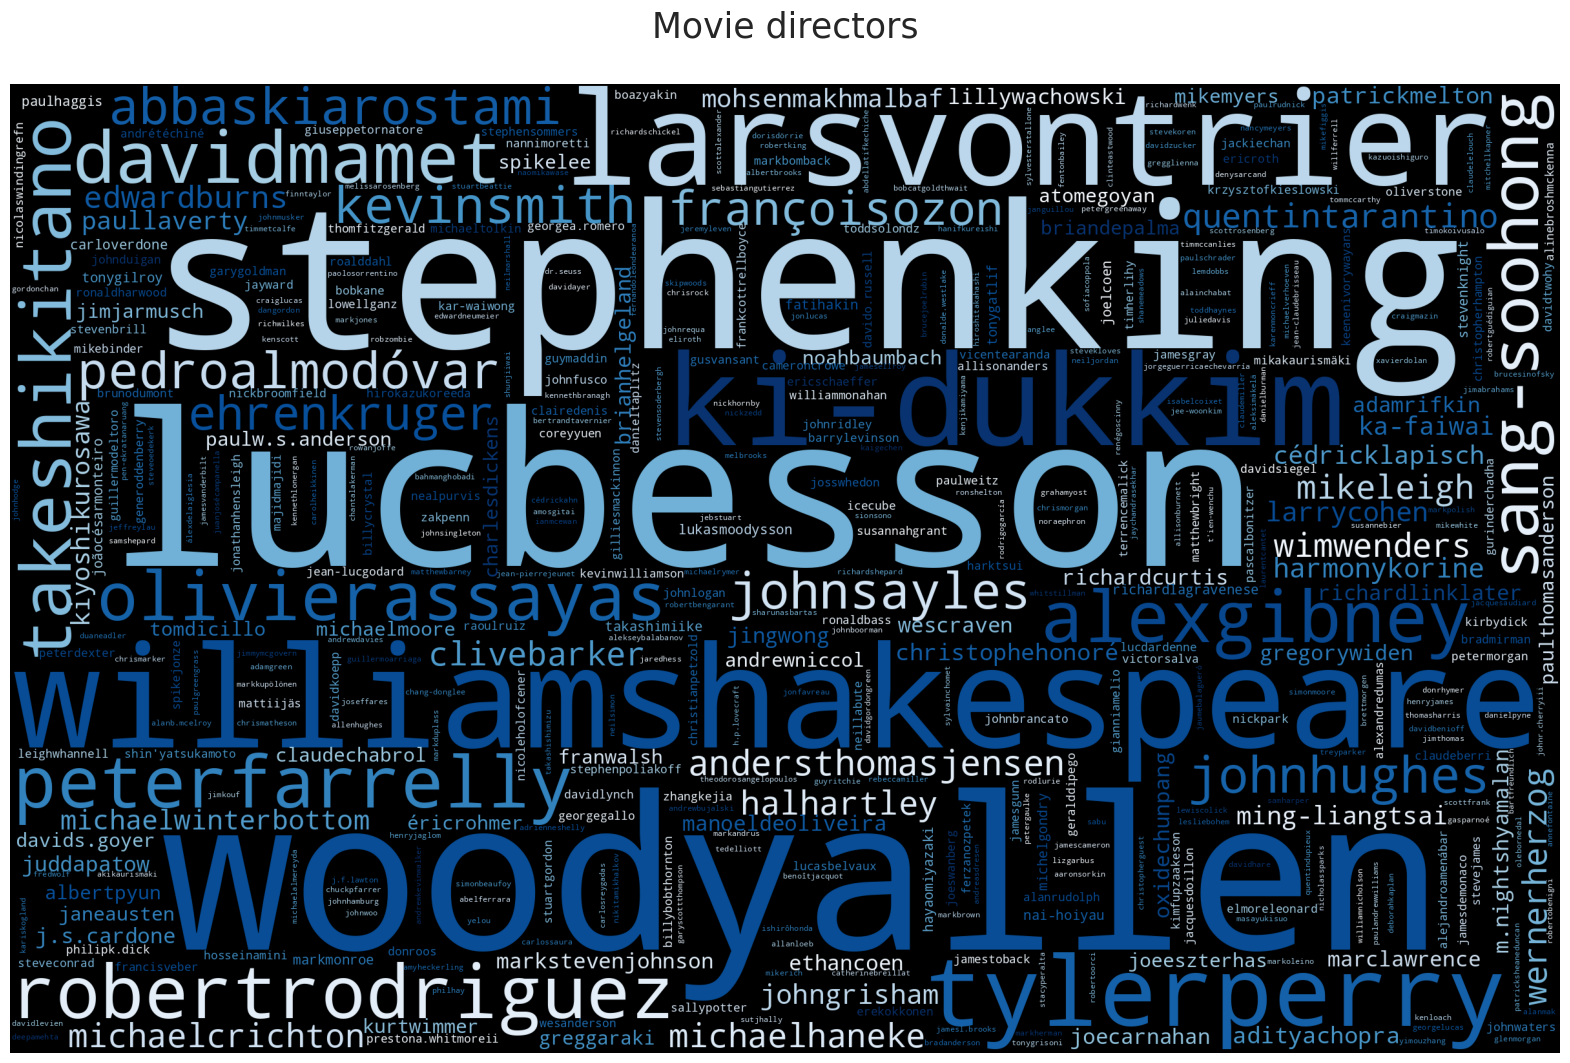

In [109]:
# Generate a WordCloud using the movie directors  
directorc = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 15)) 
plt.imshow(directorc) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

As seen earlier, Lucbesson, Stephen King, Woodyallen, Ki-dukkim and William Shakepeare are the most popular directors based on the number of films in the database that they have directed.Stephen King and william Shakespear are both writers and not directors but lots of films have been made based on their books.

We could also try and see the the most popular directors based on their ratings. We will do this by calculating the mean rating for each director to determine the most popular.

In [111]:
def count_directors(df, count = 10):
    
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

In [114]:
def dir_mean(df):
    df.set_index('director', inplace=True)
    direct_ratings = []
    
    directors_eda = eda_df.merge(imdb_df, on = 'movieId', how = 'left')
    for director in df.index:
        rating = round(directors_eda[directors_eda['director']==director]['rating'].mean(),2)
        direct_ratings.append(rating)
    df['mean_rating'] = direct_ratings
    return df.sort_values('mean_rating', ascending = False)

In [115]:
directors = dir_mean(directors)

In [116]:
directors.head()

,count,mean_rating
director,,
Stephen King,24,4.05
Quentin Tarantino,10,3.94
John Sayles,11,3.93
Ki-duk Kim,17,3.89
Pedro Almodóvar,11,3.85


In [117]:
def feat_popularity(df, title = 'feat'):
    """
    Plots the mean rating per director.
    """
    plt.figure(figsize=(10,6))
    plot_data = df.copy()
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = round(plot_data['mean_rating'].max(),2)
    sns.barplot(y = plot_data.index, x = plot_data['mean_rating'], order = plot_data.index, orient='h',palette='Set1', edgecolor='black' )
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per {title}', fontsize=14)
    plt.ylabel(f'{title}')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

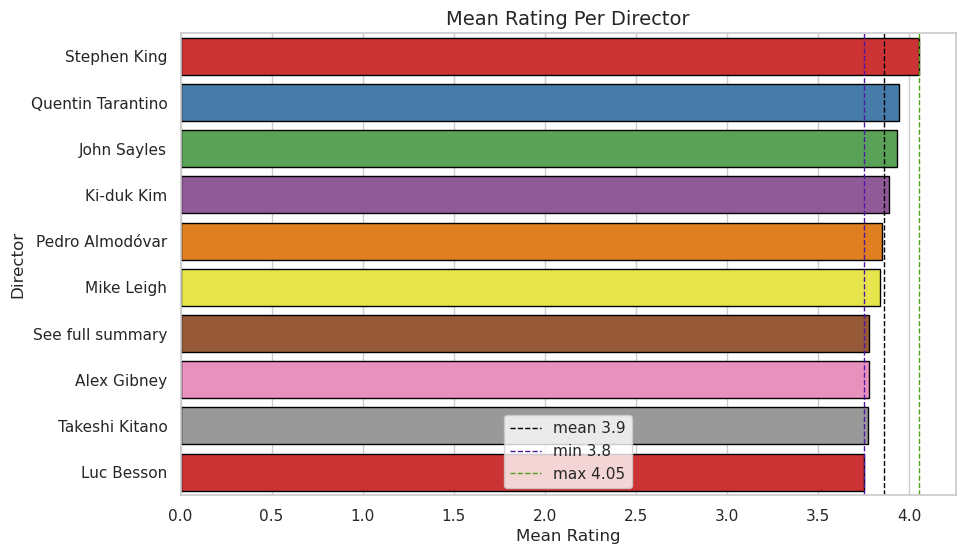

In [118]:
feat_popularity(directors.head(10), 'Director')